# Project: Wrangle and Analyza Data

In [1]:
# ALL IMPORTS
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import os
import requests
import json
import tweepy
from tweepy import OAuthHandler
from timeit import default_timer as timer

## Gather

#### The first dataset is from twitter archives provided by @WeRateDogs

In [2]:
df_twitter_archive = pd.read_csv('twitter-archive-enhanced.csv')
df_twitter_archive.head(3)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None


#### For the second dataset, he tweet image predictions, i.e., what breed of dog (or other object, animal, etc.)

In [3]:
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
file_name = url.split('/')[-1]
r = requests.get(url)

if not os.path.isfile(file_name):
    with open(file_name, 'wb') as f:
        f.write(r.content)

In [4]:
df_image_prediction = pd.read_csv('image-predictions.tsv', sep='\t')
df_image_prediction.head(3)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True


#### The Third dataset, The JSON file

In [ ]:
# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True, wait_on_rate_limit_notify=True)

tweet_ids = df_twitter_archive.tweet_id.values
len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)

In [5]:
tweet_json_data = []
with open('tweet_json.txt', 'r') as f:
    for l in f:
        try:
            tweet_json_data.append(json.loads(l))
        except:
            continue          

In [6]:
df_tweet_data = pd.DataFrame()
df_tweet_data['tweet_id'] = list(map(lambda tweet: tweet['id'], tweet_json_data))
df_tweet_data['retweet_count'] = list(map(lambda tweet: tweet['retweet_count'], tweet_json_data))
df_tweet_data['favorite_count'] = list(map(lambda tweet: tweet['favorite_count'], tweet_json_data))

df_tweet_data.head(3)

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461


## Assess

Visual and programmatic assessment of `twitter-archive-enhanced.csv`

In [7]:
df_twitter_archive.sample(10)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
183,856543823941562368,NaN,NaN,2017-04-24 16:22:16 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Callie. She'll be your navigator today...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/856543823...,12,10,Callie,None,None,None,None
2216,668537837512433665,NaN,NaN,2015-11-22 21:13:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Spark. He's nervous. Other dog hasn't ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/668537837...,8,10,Spark,None,None,None,None
1089,737800304142471168,NaN,NaN,2016-06-01 00:17:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bella. She's ubering home after a few ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/737800304...,10,10,Bella,None,None,None,None
1461,694925794720792577,NaN,NaN,2016-02-03 16:49:55 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...",Please only send in dogs. This t-rex is very s...,NaN,NaN,NaN,https://vine.co/v/iJvUqWQ166L,5,10,None,None,None,None,None
834,768473857036525572,NaN,NaN,2016-08-24 15:43:39 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Chevy. He had a late breakfast and now ha...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/768473857...,11,10,Chevy,None,None,None,None
708,785264754247995392,NaN,NaN,2016-10-09 23:44:41 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Doc. He requested to be carried around...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/785264754...,12,10,Doc,None,None,None,None
1640,684147889187209216,NaN,NaN,2016-01-04 23:02:22 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...",This is Sweets the English Bulldog. Waves back...,NaN,NaN,NaN,https://vine.co/v/ib2nTOEuuOI,12,10,Sweets,None,None,pupper,None
614,796759840936919040,NaN,NaN,2016-11-10 17:02:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to Romeo. He was just told that it's...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/796759840...,11,10,Romeo,None,None,None,None
2086,670803562457407488,NaN,NaN,2015-11-29 03:16:46 +0000,"<a href=""http://twitter.com/download/iphone"" r...",I would do radical things in the name of Dog G...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/670803562...,10,10,None,None,None,None,None
2052,671486386088865792,NaN,NaN,2015-12-01 00:30:04 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Malcolm. He just saw a spider. 10/10 h...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/671486386...,10,10,Malcolm,None,None,None,None


In [8]:
print(df_twitter_archive.shape)
df_twitter_archive.info()

(2356, 17)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), i

In [9]:
df_twitter_archive[pd.notnull(df_twitter_archive['in_reply_to_status_id'])]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
30,886267009285017600,8.862664e+17,2.281182e+09,2017-07-15 16:51:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@NonWhiteHat @MayhewMayhem omg hello tanner yo...,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
55,881633300179243008,8.816070e+17,4.738443e+07,2017-07-02 21:58:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@roushfenway These are good dogs but 17/10 is ...,NaN,NaN,NaN,NaN,17,10,None,None,None,None,None
64,879674319642796034,8.795538e+17,3.105441e+09,2017-06-27 12:14:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@RealKentMurphy 14/10 confirmed,NaN,NaN,NaN,NaN,14,10,None,None,None,None,None
113,870726314365509632,8.707262e+17,1.648776e+07,2017-06-02 19:38:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@ComplicitOwl @ShopWeRateDogs &gt;10/10 is res...,NaN,NaN,NaN,NaN,10,10,None,None,None,None,None
148,863427515083354112,8.634256e+17,7.759620e+07,2017-05-13 16:15:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@Jack_Septic_Eye I'd need a few more pics to p...,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
149,863079547188785154,6.671522e+17,4.196984e+09,2017-05-12 17:12:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Ladies and gentlemen... I found Pipsy. He may ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/863079547...,14,10,None,None,None,None,None
179,857214891891077121,8.571567e+17,1.806710e+08,2017-04-26 12:48:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@Marc_IRL pixelated af 12/10,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
184,856526610513747968,8.558181e+17,4.196984e+09,2017-04-24 15:13:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...","THIS IS CHARLIE, MARK. HE DID JUST WANT TO SAY...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/856526610...,14,10,None,None,None,None,None
186,856288084350160898,8.562860e+17,2.792810e+08,2017-04-23 23:26:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@xianmcguire @Jenna_Marbles Kardashians wouldn...,NaN,NaN,NaN,NaN,14,10,None,None,None,None,None
188,855862651834028034,8.558616e+17,1.943518e+08,2017-04-22 19:15:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@dhmontgomery We also gave snoop dogg a 420/10...,NaN,NaN,NaN,NaN,420,10,None,None,None,None,None


In [10]:
df_twitter_archive[pd.notnull(df_twitter_archive['retweeted_status_id'])]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
19,888202515573088257,NaN,NaN,2017-07-21 01:02:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Canela. She attempted s...,8.874740e+17,4.196984e+09,2017-07-19 00:47:34 +0000,https://twitter.com/dog_rates/status/887473957...,13,10,Canela,None,None,None,None
32,886054160059072513,NaN,NaN,2017-07-15 02:45:48 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @Athletics: 12/10 #BATP https://t.co/WxwJmv...,8.860537e+17,1.960740e+07,2017-07-15 02:44:07 +0000,https://twitter.com/dog_rates/status/886053434...,12,10,None,None,None,None,None
36,885311592912609280,NaN,NaN,2017-07-13 01:35:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Lilly. She just paralle...,8.305833e+17,4.196984e+09,2017-02-12 01:04:29 +0000,https://twitter.com/dog_rates/status/830583320...,13,10,Lilly,None,None,None,None
68,879130579576475649,NaN,NaN,2017-06-26 00:13:58 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Emmy. She was adopted t...,8.780576e+17,4.196984e+09,2017-06-23 01:10:23 +0000,https://twitter.com/dog_rates/status/878057613...,14,10,Emmy,None,None,None,None
73,878404777348136964,NaN,NaN,2017-06-24 00:09:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Meet Shadow. In an attempt to r...,8.782815e+17,4.196984e+09,2017-06-23 16:00:04 +0000,"https://www.gofundme.com/3yd6y1c,https://twitt...",13,10,Shadow,None,None,None,None
74,878316110768087041,NaN,NaN,2017-06-23 18:17:33 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Meet Terrance. He's being yelle...,6.690004e+17,4.196984e+09,2015-11-24 03:51:38 +0000,https://twitter.com/dog_rates/status/669000397...,11,10,Terrance,None,None,None,None
78,877611172832227328,NaN,NaN,2017-06-21 19:36:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @rachel2195: @dog_rates the boyfriend and h...,8.768508e+17,5.128045e+08,2017-06-19 17:14:49 +0000,https://twitter.com/rachel2195/status/87685077...,14,10,None,None,None,pupper,None
91,874434818259525634,NaN,NaN,2017-06-13 01:14:41 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Coco. At first I though...,8.663350e+17,4.196984e+09,2017-05-21 16:48:45 +0000,https://twitter.com/dog_rates/status/866334964...,12,10,Coco,None,None,None,None
95,873697596434513921,NaN,NaN,2017-06-11 00:25:14 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Walter. He won't start ...,8.688804e+17,4.196984e+09,2017-05-28 17:23:24 +0000,https://twitter.com/dog_rates/status/868880397...,14,10,Walter,None,None,None,None
97,873337748698140672,NaN,NaN,2017-06-10 00:35:19 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Sierra. She's one preci...,8.732138e+17,4.196984e+09,2017-06-09 16:22:42 +0000,https://www.gofundme.com/help-my-baby-sierra-g...,12,10,Sierra,None,None,pupper,None


In [11]:
df_twitter_archive[df_twitter_archive['rating_denominator'] < 10]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
313,835246439529840640,8.352460e+17,26259576.0,2017-02-24 21:54:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@jonnysun @Lin_Manuel ok jomny I know you're e...,NaN,NaN,NaN,NaN,960,0,None,None,None,None,None
516,810984652412424192,NaN,NaN,2016-12-19 23:06:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Sam. She smiles 24/7 &amp; secretly aspir...,NaN,NaN,NaN,"https://www.gofundme.com/sams-smile,https://tw...",24,7,Sam,None,None,None,None
2335,666287406224695296,NaN,NaN,2015-11-16 16:11:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is an Albanian 3 1/2 legged Episcopalian...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666287406...,1,2,an,None,None,None,None


In [12]:
print(df_twitter_archive.loc[df_twitter_archive.rating_denominator == 7, 'text'])
print(df_twitter_archive.loc[df_twitter_archive.rating_denominator == 2, 'text'])

516    Meet Sam. She smiles 24/7 &amp; secretly aspir...
Name: text, dtype: object
2335    This is an Albanian 3 1/2 legged  Episcopalian...
Name: text, dtype: object


In [13]:
df_twitter_archive[df_twitter_archive['rating_denominator'] > 10]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
342,832088576586297345,8.320875e+17,3.058208e+07,2017-02-16 04:45:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@docmisterio account started on 11/15/15,NaN,NaN,NaN,NaN,11,15,None,None,None,None,None
433,820690176645140481,NaN,NaN,2017-01-15 17:52:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",The floofs have been released I repeat the flo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/820690176...,84,70,None,None,None,None,None
784,775096608509886464,NaN,NaN,2016-09-11 22:20:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...","RT @dog_rates: After so many requests, this is...",7.403732e+17,4.196984e+09,2016-06-08 02:41:38 +0000,https://twitter.com/dog_rates/status/740373189...,9,11,None,None,None,None,None
902,758467244762497024,NaN,NaN,2016-07-28 01:00:57 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Why does this never happen at my front door......,NaN,NaN,NaN,https://twitter.com/dog_rates/status/758467244...,165,150,None,None,None,None,None
1068,740373189193256964,NaN,NaN,2016-06-08 02:41:38 +0000,"<a href=""http://twitter.com/download/iphone"" r...","After so many requests, this is Bretagne. She ...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/740373189...,9,11,None,None,None,None,None
1120,731156023742988288,NaN,NaN,2016-05-13 16:15:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to this unbelievably well behaved sq...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/731156023...,204,170,this,None,None,None,None
1165,722974582966214656,NaN,NaN,2016-04-21 02:25:47 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Happy 4/20 from the squad! 13/10 for all https...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/722974582...,4,20,None,None,None,None,None
1202,716439118184652801,NaN,NaN,2016-04-03 01:36:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bluebert. He just saw that both #Final...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/716439118...,50,50,Bluebert,None,None,None,None
1228,713900603437621249,NaN,NaN,2016-03-27 01:29:02 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Happy Saturday here's 9 puppers on a bench. 99...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/713900603...,99,90,None,None,None,None,None
1254,710658690886586372,NaN,NaN,2016-03-18 02:46:49 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's a brigade of puppers. All look very pre...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/710658690...,80,80,None,None,None,None,None


In [14]:
print('------')
print(df_twitter_archive.loc[df_twitter_archive.rating_denominator == 11, 'text'])
print('------')
print(df_twitter_archive.loc[df_twitter_archive.rating_denominator == 15, 'text'])
print('------')
print(df_twitter_archive.loc[df_twitter_archive.rating_denominator == 16, 'text'])
print('------')
print(df_twitter_archive.loc[df_twitter_archive.rating_denominator == 20, 'text'])
print('------')
print(df_twitter_archive.loc[df_twitter_archive.rating_denominator == 50, 'text'])
print('------')
print(df_twitter_archive.loc[df_twitter_archive.rating_denominator == 40, 'text'])
print('------')
print(df_twitter_archive.loc[df_twitter_archive.rating_denominator == 70, 'text'])
print('------')
print(df_twitter_archive.loc[df_twitter_archive.rating_denominator == 80, 'text'])
print('------')
print(df_twitter_archive.loc[df_twitter_archive.rating_denominator == 90, 'text'])
print('------')
print(df_twitter_archive.loc[df_twitter_archive.rating_denominator == 110, 'text'])
print('------')
print(df_twitter_archive.loc[df_twitter_archive.rating_denominator == 120, 'text'])
print('------')
print(df_twitter_archive.loc[df_twitter_archive.rating_denominator == 130, 'text'])
print('------')
print(df_twitter_archive.loc[df_twitter_archive.rating_denominator == 150, 'text'])
print('------')
print(df_twitter_archive.loc[df_twitter_archive.rating_denominator == 170, 'text'])

------
784     RT @dog_rates: After so many requests, this is...
1068    After so many requests, this is Bretagne. She ...
1662    This is Darrel. He just robbed a 7/11 and is i...
Name: text, dtype: object
------
342    @docmisterio account started on 11/15/15
Name: text, dtype: object
------
1663    I'm aware that I could've said 20/16, but here...
Name: text, dtype: object
------
1165    Happy 4/20 from the squad! 13/10 for all https...
1598    Yes I do realize a rating of 4/20 would've bee...
Name: text, dtype: object
------
1202    This is Bluebert. He just saw that both #Final...
1274    From left to right:\nCletus, Jerome, Alejandro...
1351    Here is a whole flock of puppers.  60/50 I'll ...
Name: text, dtype: object
------
1433    Happy Wednesday here's a bucket of pups. 44/40...
Name: text, dtype: object
------
433    The floofs have been released I repeat the flo...
Name: text, dtype: object
------
1254    Here's a brigade of puppers. All look very pre...
1843    Here we hav

In [15]:
print('#1')
print(df_twitter_archive['text'][1068]) # Rating: 14/10
print('#2')
print(df_twitter_archive['text'][1662]) # Rating: 10/10
print('#3')
print(df_twitter_archive['text'][1165]) # Rating: 13/10
print('#4')
print(df_twitter_archive['text'][1202]) # Rating: 11/10
print('#5')
print(df_twitter_archive['text'][1274]) # Group of dogs
print('#6')
print(df_twitter_archive['text'][1351]) # Group of dogs
print('#7')
print(df_twitter_archive['text'][1433]) # Group of dogs
print('#8')
print(df_twitter_archive['text'][433])  # Group of dogs
print('#9')
print(df_twitter_archive['text'][1254]) # Group of dogs
print('#10')
print(df_twitter_archive['text'][1843]) # Group of dogs
print('#11')
print(df_twitter_archive['text'][1228]) # Group of dogs
print('#12')
print(df_twitter_archive['text'][1635]) # Group of dogs
print('#13')
print(df_twitter_archive['text'][1779]) # Group of dogs
print('#14')
print(df_twitter_archive['text'][902])  # Group of dogs
print('#15')
print(df_twitter_archive['text'][1120]) # Group of dogs

#1
After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ
#2
This is Darrel. He just robbed a 7/11 and is in a high speed police chase. Was just spotted by the helicopter 10/10 https://t.co/7EsP8LmSp5
#3
Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a
#4
This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq
#5
From left to right:
Cletus, Jerome, Alejandro, Burp, &amp; Titson
None know where camera is. 45/50 would hug all at once https://t.co/sedre1ivTK
#6
Here is a whole flock of puppers.  60/50 I'll take the lot https://t.co/9dpcw6MdWa
#7
Happy Wednesday here's a bucket of pups. 44/40 would pet all at once https://t.co/HppvrYuamZ
#8
The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd
#9
Here's a brigade of puppers. All look very prepared for whatever happens next. 80/80 htt

In [16]:
df_twitter_archive['name'].nunique()

957

In [17]:
sum(pd.isnull(df_twitter_archive['expanded_urls']))

59

In [18]:
df_twitter_archive.name.value_counts()

None           745
a               55
Charlie         12
Oliver          11
Cooper          11
Lucy            11
Lola            10
Tucker          10
Penny           10
Bo               9
Winston          9
the              8
Sadie            8
Daisy            7
Toby             7
Buddy            7
Bailey           7
an               7
Koda             6
Bella            6
Milo             6
Jack             6
Leo              6
Dave             6
Rusty            6
Scout            6
Jax              6
Oscar            6
Stanley          6
Gus              5
              ... 
Sweet            1
Jockson          1
Combo            1
Ambrose          1
Karma            1
Skittle          1
Mary             1
Mya              1
Goose            1
Timber           1
Jerome           1
Banditt          1
Peanut           1
infuriating      1
Harlso           1
Ralpher          1
Kramer           1
Longfellow       1
Georgie          1
Ester            1
Swagger          1
Walker      

In [19]:
df_twitter_archive[df_twitter_archive['name'].str.islower()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
22,887517139158093824,NaN,NaN,2017-07-19 03:39:09 +0000,"<a href=""http://twitter.com/download/iphone"" r...",I've yet to rate a Venezuelan Hover Wiener. Th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/887517139...,14,10,such,None,None,None,None
56,881536004380872706,NaN,NaN,2017-07-02 15:32:16 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a pupper approaching maximum borkdrive...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/881536004...,14,10,a,None,None,pupper,None
118,869988702071779329,NaN,NaN,2017-05-31 18:47:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: We only rate dogs. This is quit...,8.591970e+17,4.196984e+09,2017-05-02 00:04:57 +0000,https://twitter.com/dog_rates/status/859196978...,12,10,quite,None,None,None,None
169,859196978902773760,NaN,NaN,2017-05-02 00:04:57 +0000,"<a href=""http://twitter.com/download/iphone"" r...",We only rate dogs. This is quite clearly a smo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/859196978...,12,10,quite,None,None,None,None
193,855459453768019968,NaN,NaN,2017-04-21 16:33:22 +0000,"<a href=""http://twitter.com/download/iphone"" r...","Guys, we only rate dogs. This is quite clearly...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/855459453...,12,10,quite,None,None,None,None
335,832645525019123713,NaN,NaN,2017-02-17 17:38:57 +0000,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",There's going to be a dog terminal at JFK Airp...,NaN,NaN,NaN,http://us.blastingnews.com/news/2017/02/jfk-an...,10,10,not,None,None,None,None
369,828650029636317184,NaN,NaN,2017-02-06 17:02:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...","Occasionally, we're sent fantastic stories. Th...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/828650029...,14,10,one,None,None,None,None
542,806219024703037440,NaN,NaN,2016-12-06 19:29:28 +0000,"<a href=""http://twitter.com/download/iphone"" r...",We only rate dogs. Please stop sending in non-...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/806219024...,11,10,incredibly,None,None,None,None
649,792913359805018113,NaN,NaN,2016-10-31 02:17:31 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a perfect example of someone who has t...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/792913359...,13,10,a,None,None,None,None
682,788552643979468800,NaN,NaN,2016-10-19 01:29:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Say hello to mad pupper. You kn...,7.363926e+17,4.196984e+09,2016-05-28 03:04:00 +0000,"https://vine.co/v/iEggaEOiLO3,https://vine.co/...",13,10,mad,None,None,pupper,None


In [20]:
set(df_twitter_archive[df_twitter_archive['name'].str.islower()].name)

{'a',
 'actually',
 'all',
 'an',
 'by',
 'getting',
 'his',
 'incredibly',
 'infuriating',
 'just',
 'life',
 'light',
 'mad',
 'my',
 'not',
 'officially',
 'old',
 'one',
 'quite',
 'space',
 'such',
 'the',
 'this',
 'unacceptable',
 'very'}

In [21]:
df_twitter_archive[df_twitter_archive['rating_denominator'] < 10]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
313,835246439529840640,8.352460e+17,26259576.0,2017-02-24 21:54:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@jonnysun @Lin_Manuel ok jomny I know you're e...,NaN,NaN,NaN,NaN,960,0,None,None,None,None,None
516,810984652412424192,NaN,NaN,2016-12-19 23:06:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Sam. She smiles 24/7 &amp; secretly aspir...,NaN,NaN,NaN,"https://www.gofundme.com/sams-smile,https://tw...",24,7,Sam,None,None,None,None
2335,666287406224695296,NaN,NaN,2015-11-16 16:11:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is an Albanian 3 1/2 legged Episcopalian...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666287406...,1,2,an,None,None,None,None


In [22]:
df_twitter_archive[df_twitter_archive['rating_denominator'] > 10]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
342,832088576586297345,8.320875e+17,3.058208e+07,2017-02-16 04:45:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@docmisterio account started on 11/15/15,NaN,NaN,NaN,NaN,11,15,None,None,None,None,None
433,820690176645140481,NaN,NaN,2017-01-15 17:52:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",The floofs have been released I repeat the flo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/820690176...,84,70,None,None,None,None,None
784,775096608509886464,NaN,NaN,2016-09-11 22:20:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...","RT @dog_rates: After so many requests, this is...",7.403732e+17,4.196984e+09,2016-06-08 02:41:38 +0000,https://twitter.com/dog_rates/status/740373189...,9,11,None,None,None,None,None
902,758467244762497024,NaN,NaN,2016-07-28 01:00:57 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Why does this never happen at my front door......,NaN,NaN,NaN,https://twitter.com/dog_rates/status/758467244...,165,150,None,None,None,None,None
1068,740373189193256964,NaN,NaN,2016-06-08 02:41:38 +0000,"<a href=""http://twitter.com/download/iphone"" r...","After so many requests, this is Bretagne. She ...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/740373189...,9,11,None,None,None,None,None
1120,731156023742988288,NaN,NaN,2016-05-13 16:15:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to this unbelievably well behaved sq...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/731156023...,204,170,this,None,None,None,None
1165,722974582966214656,NaN,NaN,2016-04-21 02:25:47 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Happy 4/20 from the squad! 13/10 for all https...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/722974582...,4,20,None,None,None,None,None
1202,716439118184652801,NaN,NaN,2016-04-03 01:36:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bluebert. He just saw that both #Final...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/716439118...,50,50,Bluebert,None,None,None,None
1228,713900603437621249,NaN,NaN,2016-03-27 01:29:02 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Happy Saturday here's 9 puppers on a bench. 99...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/713900603...,99,90,None,None,None,None,None
1254,710658690886586372,NaN,NaN,2016-03-18 02:46:49 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's a brigade of puppers. All look very pre...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/710658690...,80,80,None,None,None,None,None


In [23]:
df_twitter_archive[df_twitter_archive['rating_numerator'] == 0]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
315,835152434251116546,NaN,NaN,2017-02-24 15:40:31 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you're so blinded by your systematic plag...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/835152434...,0,10,None,None,None,None,None
1016,746906459439529985,7.468859e+17,4.196984e+09,2016-06-26 03:22:31 +0000,"<a href=""http://twitter.com/download/iphone"" r...","PUPDATE: can't see any. Even if I could, I cou...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/746906459...,0,10,None,None,None,None,None


In [24]:
df_twitter_archive['text'][246] # THIS IS NOT A DOG TWEET, I WILL DROP IT

"C'mon guys. Please only send in dogs. We only rate dogs, not Exceptional-Tongued Peruvian Floor Bears. Thank you... 12/10 https://t.co/z30iQLiXNo"

In [25]:
sum(df_twitter_archive.name.duplicated())

1399

Visual and programmatic assessment of `image_prediction.tsv`

In [26]:
df_image_prediction.sample(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
645,681610798867845120,https://pbs.twimg.com/media/CXWRZBgWkAEHMea.jpg,1,toy_poodle,0.821704,True,miniature_poodle,0.116042,True,Yorkshire_terrier,0.014847,True
331,672125275208069120,https://pbs.twimg.com/media/CVPeX2dWwAEwyaR.jpg,1,tennis_ball,0.999834,False,golden_retriever,0.000087,True,racket,0.000053,False
1952,863553081350529029,https://pbs.twimg.com/ext_tw_video_thumb/86355...,1,Eskimo_dog,0.413330,True,malamute,0.347646,True,Siberian_husky,0.149536,True
1196,740373189193256964,https://pbs.twimg.com/media/CkZVdJ6WYAAXZ5A.jpg,3,golden_retriever,0.807644,True,kuvasz,0.101286,True,Labrador_retriever,0.023785,True
1410,770655142660169732,https://pbs.twimg.com/media/CrHqwjWXgAAgJSe.jpg,1,Madagascar_cat,0.494803,False,skunk,0.161184,False,paper_towel,0.091572,False
1571,794983741416415232,https://pbs.twimg.com/media/CvT6IV6WEAQhhV5.jpg,3,schipperke,0.363272,True,kelpie,0.197021,True,Norwegian_elkhound,0.151024,True
525,676606785097199616,https://pbs.twimg.com/media/CWPKSGpWcAQN6mw.jpg,1,Loafer,0.202999,False,doormat,0.200411,False,malinois,0.142300,True
567,678341075375947776,https://pbs.twimg.com/media/CWnznDTU4AAa-6P.jpg,1,golden_retriever,0.853284,True,cocker_spaniel,0.026230,True,Labrador_retriever,0.024123,True
200,669680153564442624,https://pbs.twimg.com/media/CUsuijgXAAE4pdi.jpg,1,dalmatian,0.141257,True,borzoi,0.137744,True,Labrador_retriever,0.103792,True
963,705975130514706432,https://pbs.twimg.com/media/CcwgjmuXIAEQoSd.jpg,1,Staffordshire_bullterrier,0.587764,True,American_Staffordshire_terrier,0.281429,True,bull_mastiff,0.094798,True


In [27]:
print(df_image_prediction.shape)
df_image_prediction.info()

(2075, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


Visual and programmatic assessment of `tweet-json`

In [28]:
df_tweet_data.sample(10)

,tweet_id,retweet_count,favorite_count
1429,697516214579523584,1282,2281
2308,666786068205871104,521,800
117,869988702071779329,25661,0
2318,666437273139982337,52,131
846,766069199026450432,1003,4765
418,822244816520155136,11421,38832
763,777953400541634568,4080,0
13,889638837579907072,4735,27672
1976,672984142909456390,593,1338
1013,747103485104099331,4548,10534


In [29]:
print(df_tweet_data.shape)
df_tweet_data.info()

(2354, 3)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
tweet_id          2354 non-null int64
retweet_count     2354 non-null int64
favorite_count    2354 non-null int64
dtypes: int64(3)
memory usage: 55.2 KB


In [30]:
df_tweet_data.favorite_count.value_counts()

0        179
610        3
345        3
2918       3
1691       3
2176       3
2768       3
1339       3
2706       3
522        2
3134       2
1618       2
250        2
2250       2
2660       2
2262       2
2305       2
1111       2
784        2
4878       2
346        2
14685      2
780        2
6923       2
6515       2
2433       2
3603       2
13518      2
3593       2
1536       2
        ... 
4681       1
523        1
559        1
802        1
527        1
27154      1
6676       1
535        1
537        1
6682       1
8731       1
23074      1
21029      1
667        1
6696       1
2608       1
35400      1
21041      1
4659       1
10804      1
4099       1
68152      1
10812      1
573        1
6718       1
33345      1
814        1
23108      1
2630       1
8143       1
Name: favorite_count, Length: 2007, dtype: int64

In [31]:
df_tweet_data.retweet_count.value_counts()

1972     5
3652     5
83       5
146      4
61       4
748      4
2243     4
336      4
183      4
179      4
1207     4
265      4
115      4
71       4
1124     4
542      4
819      4
577      4
516      4
397      3
619      3
661      3
2511     3
261      3
431      3
482      3
403      3
557      3
572      3
576      3
        ..
2088     1
1271     1
2030     1
43       1
5365     1
4143     1
3316     1
1263     1
16439    1
2104     1
4125     1
27       1
4121     1
4119     1
4079     1
1285     1
10226    1
8183     1
2042     1
11524    1
6148     1
7        1
1281     1
2060     1
1825     1
8209     1
19       1
2068     1
30742    1
0        1
Name: retweet_count, Length: 1724, dtype: int64

In [32]:
print(df_tweet_data.query('retweet_count == 0' and 'favorite_count == 0'))
df_tweet_data.query('retweet_count == 0')

                tweet_id  retweet_count  favorite_count
31    886054160059072513            108               0
35    885311592912609280          19297               0
67    879130579576475649           7181               0
72    878404777348136964           1349               0
73    878316110768087041           6965               0
77    877611172832227328             83               0
90    874434818259525634          15546               0
94    873697596434513921          12518               0
96    873337748698140672           1667               0
100   872668790621863937             31               0
108   871166179821445120           5991               0
117   869988702071779329          25661               0
123   868639477480148993           2240               0
129   867072653475098625            135               0
131   866816280283807744          32883               0
136   866094527597207552           8952               0
145   863471782782697472           2687         

,tweet_id,retweet_count,favorite_count
290,838085839343206401,0,150


In [33]:
df_twitter_archive[df_twitter_archive.index == 290] # Will be deleted already with deleting replies

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
290,838150277551247360,8.381455e+17,21955058.0,2017-03-04 22:12:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@markhoppus 182/10,NaN,NaN,NaN,NaN,182,10,None,None,None,None,None


In [34]:
df_twitter_archive[df_twitter_archive.index == 164]
df_twitter_archive['text'][290]

'@markhoppus 182/10'

### Assessing Summary

#### Quality

##### For `df_twitter_archive data`:
- Change timestamp column from string to datetime type
- Rating denomenator less than 10 (Incorrect values in ratings)
- Remove tweets that are retweets or replies 
- Drop retweets and replies columns
- Remove tweets that have no image
- Change wrong dog names to 'None'

##### For `df_image_processing data`:
- Remove IDs that is not in df_twitter_archive data
- Fix dog names in p1, p2 and p3


##### For all three dataframes
- Change tweet_id type to string (object) in the three dataframes


#### Tidiness
- Merge the `doggo`, `floofer`, `pupper` and puppo in one column df_twitter_archive data
- Join `df_tweet_data` and `df_image_processing` to `df_twitter_archive`

## Clean

In [35]:
df_twitter_archive_clean = df_twitter_archive.copy()
df_image_prediction_clean = df_image_prediction.copy()
df_tweet_data_clean = df_tweet_data.copy()

#### Define

- Change tweet_id type to string (object) in the three dataframes
- Change timestamp column from string to datetime type

#### Code

In [36]:
df_twitter_archive_clean['tweet_id'] = df_twitter_archive_clean['tweet_id'].astype(str)
df_image_prediction_clean['tweet_id'] = df_image_prediction_clean['tweet_id'].astype(str)
df_tweet_data_clean['tweet_id'] = df_tweet_data_clean['tweet_id'].astype(str)

df_twitter_archive_clean['timestamp'] = pd.to_datetime(df_twitter_archive_clean['timestamp'])

#### Test

In [37]:
df_twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null object
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null datetime64[ns, UTC]
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: datetime64

In [38]:
df_image_prediction_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null object
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(1), object(5)
memory usage: 152.1+ KB


In [39]:
df_tweet_data_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
tweet_id          2354 non-null object
retweet_count     2354 non-null int64
favorite_count    2354 non-null int64
dtypes: int64(2), object(1)
memory usage: 55.2+ KB


#### Define

- Drop retweets, replies and tweets with no image
- `tweet_id` column in `df_image_processing_clean` and `df_tweet_data_clean` are in `df_twitter_archive_clean`
- Drop `in_reply_to_status_id`, `in_reply_to_user_id`, `retweeted_status_id` and `retweeted_status_user_id` columns

#### Code

In [40]:
replies_df = df_twitter_archive_clean[pd.notnull(df_twitter_archive_clean['in_reply_to_status_id'])]
retweets_df = df_twitter_archive_clean[pd.notnull(df_twitter_archive_clean['retweeted_status_id'])]

df_twitter_archive_clean = df_twitter_archive_clean.drop(replies_df.index, axis=0)
df_twitter_archive_clean = df_twitter_archive_clean.drop(retweets_df.index, axis=0)

In [41]:
no_img_df = df_twitter_archive_clean[pd.isnull(df_twitter_archive_clean['expanded_urls'])]
no_img_df = df_twitter_archive_clean.drop(no_img_df.index, axis=0)

In [42]:
df_in_pred_not_in_archive = (~df_image_prediction_clean.tweet_id.isin(list(df_twitter_archive_clean.tweet_id)))
df_image_prediction_clean = df_image_prediction_clean[~df_in_pred_not_in_archive]

In [43]:
df_in_api_not_in_archive = (~df_tweet_data_clean.tweet_id.isin(list(df_twitter_archive_clean.tweet_id)))
df_tweet_data_clean = df_tweet_data_clean[~df_in_api_not_in_archive]

In [44]:
columns_to_drop =['in_reply_to_status_id', 'in_reply_to_user_id', 'source', 'retweeted_status_id', 
                  'retweeted_status_user_id', 'retweeted_status_timestamp', 'expanded_urls']

df_twitter_archive_clean = df_twitter_archive_clean.drop(columns_to_drop, axis=1)

#### Test

In [45]:
df_twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 10 columns):
tweet_id              2097 non-null object
timestamp             2097 non-null datetime64[ns, UTC]
text                  2097 non-null object
rating_numerator      2097 non-null int64
rating_denominator    2097 non-null int64
name                  2097 non-null object
doggo                 2097 non-null object
floofer               2097 non-null object
pupper                2097 non-null object
puppo                 2097 non-null object
dtypes: datetime64[ns, UTC](1), int64(2), object(7)
memory usage: 260.2+ KB


In [46]:
df_image_prediction_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1971 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    1971 non-null object
jpg_url     1971 non-null object
img_num     1971 non-null int64
p1          1971 non-null object
p1_conf     1971 non-null float64
p1_dog      1971 non-null bool
p2          1971 non-null object
p2_conf     1971 non-null float64
p2_dog      1971 non-null bool
p3          1971 non-null object
p3_conf     1971 non-null float64
p3_dog      1971 non-null bool
dtypes: bool(3), float64(3), int64(1), object(5)
memory usage: 159.8+ KB


#### Define

##### In `df_twitter_archive_clean`
- Null values under `doggo`, `floofer`, `pupper` and `puppo` columns are displayed as "None" object.
- Combine the `doggo`, `floofer`, `pupper` and `puppo` columns in df_twitter_archive data into one column `dog_stage`.

#### Code

In [47]:
dog_stages = df_twitter_archive_clean.columns[-4:]
dog_stages

Index(['doggo', 'floofer', 'pupper', 'puppo'], dtype='object')

In [48]:
df_twitter_archive_clean.doggo = df_twitter_archive_clean.doggo.apply(lambda val: pd.np.nan if val == 'None' else val)
df_twitter_archive_clean.floofer = df_twitter_archive_clean.floofer.apply(lambda val: pd.np.nan if val == 'None' else val)
df_twitter_archive_clean.pupper = df_twitter_archive_clean.pupper.apply(lambda val: pd.np.nan if val == 'None' else val)
df_twitter_archive_clean.puppo = df_twitter_archive_clean.puppo.apply(lambda val: pd.np.nan if val == 'None' else val)

In [49]:
def get_dog_stage(r):
    stage_number = r[dog_stages].count().sum()
    if stage_number > 1:
        return 'varies'
    elif r.doggo == dog_stages[0]:
        return dog_stages[0]
    elif r.floofer == dog_stages[1]:
        return dog_stages[1]
    elif r.pupper == dog_stages[2]:
        return dog_stages[2]
    else:
        return dog_stages[3]
        
    return pd.np.nan       
    
df_twitter_archive_clean['dog_stage'] = df_twitter_archive_clean.apply(lambda r: get_dog_stage(r), axis = 1)

In [50]:
df_twitter_archive_clean.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis=1, inplace=True)

#### Test

In [51]:
df_twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 7 columns):
tweet_id              2097 non-null object
timestamp             2097 non-null datetime64[ns, UTC]
text                  2097 non-null object
rating_numerator      2097 non-null int64
rating_denominator    2097 non-null int64
name                  2097 non-null object
dog_stage             2097 non-null object
dtypes: datetime64[ns, UTC](1), int64(2), object(4)
memory usage: 211.1+ KB


#### Define

- Change ratings datatypes in `df_twitter_archive_clean` to float
- Fix `rating_numerator` and `rating_denominator` wrong values to the true one

#### Code

In [52]:
df_twitter_archive_clean[['rating_numerator', 'rating_denominator']] = df_twitter_archive_clean[['rating_numerator','rating_denominator']].astype(float)

In [53]:
df_twitter_archive_clean[df_twitter_archive_clean['rating_numerator'] == 0]

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,dog_stage
315,835152434251116546,2017-02-24 15:40:31+00:00,When you're so blinded by your systematic plag...,0.0,10.0,None,puppo


In [54]:
df_twitter_archive_clean['rating_numerator'][2335] = 9
df_twitter_archive_clean['rating_denominator'][2335] = 10

df_twitter_archive_clean['rating_numerator'][1068] = 14
df_twitter_archive_clean['rating_denominator'][1068] = 10

df_twitter_archive_clean['rating_numerator'][1662] = 10
df_twitter_archive_clean['rating_denominator'][1662] = 10

df_twitter_archive_clean['rating_numerator'][1165] = 13
df_twitter_archive_clean['rating_denominator'][1165] = 10

df_twitter_archive_clean['rating_numerator'][1202] = 11
df_twitter_archive_clean['rating_denominator'][1202] = 10


df_twitter_archive_clean = df_twitter_archive_clean.drop(df_twitter_archive_clean.index[516], axis=0)
df_twitter_archive_clean = df_twitter_archive_clean.drop(df_twitter_archive_clean.index[246], axis=0)

df_twitter_archive_clean['rating_numerator'] = 10 * df_twitter_archive_clean['rating_numerator'] / df_twitter_archive_clean['rating_denominator']
df_twitter_archive_clean['rating_denominator'] = 10


/home/fatema/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/home/fatema/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/home/fatema/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/home/fatema/anaconda3/lib/python3.7/

#### Test

In [55]:
df_twitter_archive_clean[df_twitter_archive_clean['rating_denominator'] > 10]

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,dog_stage


In [56]:
df_twitter_archive_clean[df_twitter_archive_clean['rating_denominator'] < 10]

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,dog_stage


#### Define

- Change wrong dog names to 'None'

#### Code

In [57]:
not_dog_names = list(set(df_twitter_archive[df_twitter_archive['name'].str.islower()].name))

df_twitter_archive_clean['name'] = df_twitter_archive_clean['name'].replace(not_dog_names, 'None')

#### Test

In [58]:
df_twitter_archive_clean[df_twitter_archive_clean.name.isin(not_dog_names)]

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,dog_stage


In [59]:
df_twitter_archive_clean.head(10)

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,dog_stage
0,892420643555336193,2017-08-01 16:23:56+00:00,This is Phineas. He's a mystical boy. Only eve...,13.0,10,Phineas,puppo
1,892177421306343426,2017-08-01 00:17:27+00:00,This is Tilly. She's just checking pup on you....,13.0,10,Tilly,puppo
2,891815181378084864,2017-07-31 00:18:03+00:00,This is Archie. He is a rare Norwegian Pouncin...,12.0,10,Archie,puppo
3,891689557279858688,2017-07-30 15:58:51+00:00,This is Darla. She commenced a snooze mid meal...,13.0,10,Darla,puppo
4,891327558926688256,2017-07-29 16:00:24+00:00,This is Franklin. He would like you to stop ca...,12.0,10,Franklin,puppo
5,891087950875897856,2017-07-29 00:08:17+00:00,Here we have a majestic great white breaching ...,13.0,10,None,puppo
6,890971913173991426,2017-07-28 16:27:12+00:00,Meet Jax. He enjoys ice cream so much he gets ...,13.0,10,Jax,puppo
7,890729181411237888,2017-07-28 00:22:40+00:00,When you watch your owner call another dog a g...,13.0,10,None,puppo
8,890609185150312448,2017-07-27 16:25:51+00:00,This is Zoey. She doesn't want to be one of th...,13.0,10,Zoey,puppo
9,890240255349198849,2017-07-26 15:59:51+00:00,This is Cassie. She is a college pup. Studying...,14.0,10,Cassie,doggo


#### Define

##### For `df_image_prediction_clean`
- Fix dog names in p1, p2 and p3
- The column names should be mpre descriptive

#### Code

In [60]:
df_image_prediction_clean.p1 = df_image_prediction_clean.p1.str.replace('_', ' ').str.title()
df_image_prediction_clean.p2 = df_image_prediction_clean.p2.str.replace('_', ' ').str.title()
df_image_prediction_clean.p3 = df_image_prediction_clean.p3.str.replace('_', ' ').str.title()

In [61]:
to_be_desc_cols = list(df_image_prediction_clean.columns)
to_be_desc_cols

['tweet_id',
 'jpg_url',
 'img_num',
 'p1',
 'p1_conf',
 'p1_dog',
 'p2',
 'p2_conf',
 'p2_dog',
 'p3',
 'p3_conf',
 'p3_dog']

In [62]:
to_be_desc_cols[3] = 'prediction_1'
to_be_desc_cols[4] = 'confidence_1'
to_be_desc_cols[5] = 'dog_1'
to_be_desc_cols[6] = 'prediction_2'
to_be_desc_cols[7] = 'confidence_2'
to_be_desc_cols[8] = 'dog_2'
to_be_desc_cols[9] = 'prediction_3'
to_be_desc_cols[10] = 'confidence_3'
to_be_desc_cols[11] = 'dog_3'
to_be_desc_cols

['tweet_id',
 'jpg_url',
 'img_num',
 'prediction_1',
 'confidence_1',
 'dog_1',
 'prediction_2',
 'confidence_2',
 'dog_2',
 'prediction_3',
 'confidence_3',
 'dog_3']

In [63]:
df_image_prediction_clean.columns = to_be_desc_cols

#### Test

In [64]:
df_image_prediction_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1971 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id        1971 non-null object
jpg_url         1971 non-null object
img_num         1971 non-null int64
prediction_1    1971 non-null object
confidence_1    1971 non-null float64
dog_1           1971 non-null bool
prediction_2    1971 non-null object
confidence_2    1971 non-null float64
dog_2           1971 non-null bool
prediction_3    1971 non-null object
confidence_3    1971 non-null float64
dog_3           1971 non-null bool
dtypes: bool(3), float64(3), int64(1), object(5)
memory usage: 159.8+ KB


In [65]:
df_image_prediction_clean.head()

,tweet_id,jpg_url,img_num,prediction_1,confidence_1,dog_1,prediction_2,confidence_2,dog_2,prediction_3,confidence_3,dog_3
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh Springer Spaniel,0.465074,True,Collie,0.156665,True,Shetland Sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,Redbone,0.506826,True,Miniature Pinscher,0.074192,True,Rhodesian Ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German Shepherd,0.596461,True,Malinois,0.138584,True,Bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian Ridgeback,0.408143,True,Redbone,0.360687,True,Miniature Pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,Miniature Pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


#### Define

- Merge the three tables

#### Code

In [66]:
df_twitter_archive_clean = pd.merge(left = df_twitter_archive_clean, right = df_image_prediction_clean, 
                                    how = 'left', on = 'tweet_id')

df_twitter_archive_clean = pd.merge(left = df_twitter_archive_clean, right = df_tweet_data_clean, 
                                    how = 'left', on = 'tweet_id')

#### Test

In [67]:
df_twitter_archive_clean.head()

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,dog_stage,jpg_url,img_num,prediction_1,confidence_1,dog_1,prediction_2,confidence_2,dog_2,prediction_3,confidence_3,dog_3,retweet_count,favorite_count
0,892420643555336193,2017-08-01 16:23:56+00:00,This is Phineas. He's a mystical boy. Only eve...,13.0,10,Phineas,puppo,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1.0,Orange,0.097049,False,Bagel,0.085851,False,Banana,0.076110,False,8853,39467
1,892177421306343426,2017-08-01 00:17:27+00:00,This is Tilly. She's just checking pup on you....,13.0,10,Tilly,puppo,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1.0,Chihuahua,0.323581,True,Pekinese,0.090647,True,Papillon,0.068957,True,6514,33819
2,891815181378084864,2017-07-31 00:18:03+00:00,This is Archie. He is a rare Norwegian Pouncin...,12.0,10,Archie,puppo,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1.0,Chihuahua,0.716012,True,Malamute,0.078253,True,Kelpie,0.031379,True,4328,25461
3,891689557279858688,2017-07-30 15:58:51+00:00,This is Darla. She commenced a snooze mid meal...,13.0,10,Darla,puppo,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1.0,Paper Towel,0.170278,False,Labrador Retriever,0.168086,True,Spatula,0.040836,False,8964,42908
4,891327558926688256,2017-07-29 16:00:24+00:00,This is Franklin. He would like you to stop ca...,12.0,10,Franklin,puppo,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2.0,Basset,0.555712,True,English Springer,0.225770,True,German Short-Haired Pointer,0.175219,True,9774,41048


In [69]:
df_twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2096 entries, 0 to 2095
Data columns (total 20 columns):
tweet_id              2096 non-null object
timestamp             2096 non-null datetime64[ns, UTC]
text                  2096 non-null object
rating_numerator      2096 non-null float64
rating_denominator    2096 non-null int64
name                  2096 non-null object
dog_stage             2096 non-null object
jpg_url               1970 non-null object
img_num               1970 non-null float64
prediction_1          1970 non-null object
confidence_1          1970 non-null float64
dog_1                 1970 non-null object
prediction_2          1970 non-null object
confidence_2          1970 non-null float64
dog_2                 1970 non-null object
prediction_3          1970 non-null object
confidence_3          1970 non-null float64
dog_3                 1970 non-null object
retweet_count         2096 non-null int64
favorite_count        2096 non-null int64
dtypes: datetime64

## Save the clean dataset

In [68]:
df_twitter_archive_clean.to_csv('twitter_archive_master.csv', index=False)

## Analysis

In [69]:
df = pd.read_csv('twitter_archive_master.csv')
df.head()

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,dog_stage,jpg_url,img_num,prediction_1,confidence_1,dog_1,prediction_2,confidence_2,dog_2,prediction_3,confidence_3,dog_3,retweet_count,favorite_count
0,892420643555336193,2017-08-01 16:23:56+00:00,This is Phineas. He's a mystical boy. Only eve...,13.0,10,Phineas,puppo,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1.0,Orange,0.097049,False,Bagel,0.085851,False,Banana,0.076110,False,8853,39467
1,892177421306343426,2017-08-01 00:17:27+00:00,This is Tilly. She's just checking pup on you....,13.0,10,Tilly,puppo,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1.0,Chihuahua,0.323581,True,Pekinese,0.090647,True,Papillon,0.068957,True,6514,33819
2,891815181378084864,2017-07-31 00:18:03+00:00,This is Archie. He is a rare Norwegian Pouncin...,12.0,10,Archie,puppo,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1.0,Chihuahua,0.716012,True,Malamute,0.078253,True,Kelpie,0.031379,True,4328,25461
3,891689557279858688,2017-07-30 15:58:51+00:00,This is Darla. She commenced a snooze mid meal...,13.0,10,Darla,puppo,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1.0,Paper Towel,0.170278,False,Labrador Retriever,0.168086,True,Spatula,0.040836,False,8964,42908
4,891327558926688256,2017-07-29 16:00:24+00:00,This is Franklin. He would like you to stop ca...,12.0,10,Franklin,puppo,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2.0,Basset,0.555712,True,English Springer,0.225770,True,German Short-Haired Pointer,0.175219,True,9774,41048


In [72]:
df.describe().apply(lambda s: s.apply('{0:.5f}'.format))

,tweet_id,rating_numerator,rating_denominator,img_num,confidence_1,confidence_2,confidence_3,retweet_count,favorite_count
count,2095.00000,2095.00000,2095.00000,1969.00000,1969.00000,1969.00000,1969.00000,2095.00000,2095.00000
mean,736487223281261952.00000,11.71040,10.00000,1.20061,0.59429,0.13468,0.06020,2841.18854,8972.55513
std,67089361036593736.00000,39.67644,0.00000,0.55754,0.27211,0.10106,0.05095,4711.46003,12200.63061
min,666020888022790144.00000,1.00000,10.00000,1.00000,0.04433,0.00000,0.00000,16.00000,81.00000
25%,676815698887325696.00000,10.00000,10.00000,1.00000,0.36292,0.05352,0.01611,643.50000,2045.50000
50%,709566166965075968.00000,11.00000,10.00000,1.00000,0.58751,0.11740,0.04947,1403.00000,4195.00000
75%,787360201867403264.00000,12.00000,10.00000,1.00000,0.84729,0.19557,0.09157,3285.00000,11413.50000
max,892420643555336192.00000,1776.00000,10.00000,4.00000,1.00000,0.48801,0.27342,79515.00000,132810.00000


In [71]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
tweet_id,2095.0,7.364872e+17,6.708936e+16,6.660209e+17,6.768157e+17,7.095662e+17,7.873602e+17,8.924206e+17
rating_numerator,2095.0,1.171040e+01,3.967644e+01,1.000000e+00,1.000000e+01,1.100000e+01,1.200000e+01,1.776000e+03
rating_denominator,2095.0,1.000000e+01,0.000000e+00,1.000000e+01,1.000000e+01,1.000000e+01,1.000000e+01,1.000000e+01
img_num,1969.0,1.200609e+00,5.575422e-01,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,4.000000e+00
confidence_1,1969.0,5.942913e-01,2.721136e-01,4.433340e-02,3.629250e-01,5.875070e-01,8.472920e-01,1.000000e+00
confidence_2,1969.0,1.346795e-01,1.010563e-01,1.011300e-08,5.351500e-02,1.174020e-01,1.955730e-01,4.880140e-01
confidence_3,1969.0,6.019809e-02,5.095277e-02,1.740170e-10,1.610520e-02,4.947150e-02,9.157150e-02,2.734190e-01
retweet_count,2095.0,2.841189e+03,4.711460e+03,1.600000e+01,6.435000e+02,1.403000e+03,3.285000e+03,7.951500e+04
favorite_count,2095.0,8.972555e+03,1.220063e+04,8.100000e+01,2.045500e+03,4.195000e+03,1.141350e+04,1.328100e+05


In [74]:
df[['rating_numerator','retweet_count','favorite_count']].describe().apply(lambda s: s.apply('{0:.5f}'.format))

,rating_numerator,retweet_count,favorite_count
count,2095.00000,2095.00000,2095.00000
mean,11.71040,2841.18854,8972.55513
std,39.67644,4711.46003,12200.63061
min,1.00000,16.00000,81.00000
25%,10.00000,643.50000,2045.50000
50%,11.00000,1403.00000,4195.00000
75%,12.00000,3285.00000,11413.50000
max,1776.00000,79515.00000,132810.00000


In [82]:
df.dog_stage.value_counts()

puppo      1782
pupper      221
doggo        72
varies       11
floofer       9
Name: dog_stage, dtype: int64

In [82]:
y = list(df.dog_stage.value_counts())
y

[1783, 221, 72, 11, 9]

In [81]:
stgs = dict(df.dog_stage.value_counts())
stgs

{'puppo': 1782, 'pupper': 221, 'doggo': 72, 'varies': 11, 'floofer': 9}

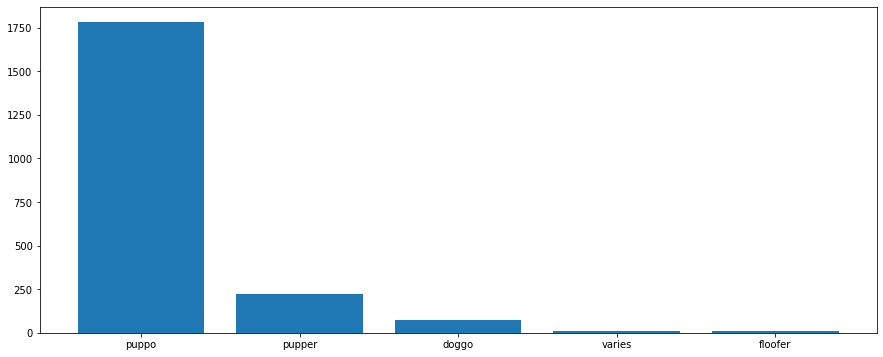

In [84]:
plt.figure(figsize=(15, 6))
plt.bar(list(stgs.keys()), list(stgs.values()))
plt.xlabel = "Dog Stages"
plt.ylabel = "Dog Stages Count"
plt.show()

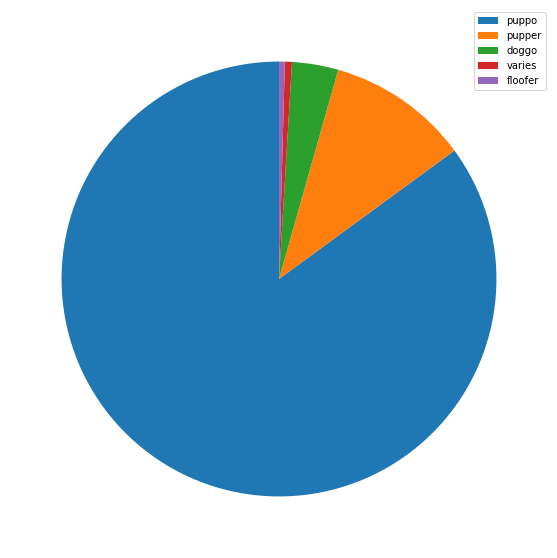

In [77]:
labels = list(stgs.keys())
counts = list(stgs.values())

plt.figure(figsize=(10, 10))
patches, texts = plt.pie(counts, startangle=90)
plt.legend(patches, labels, loc="best")

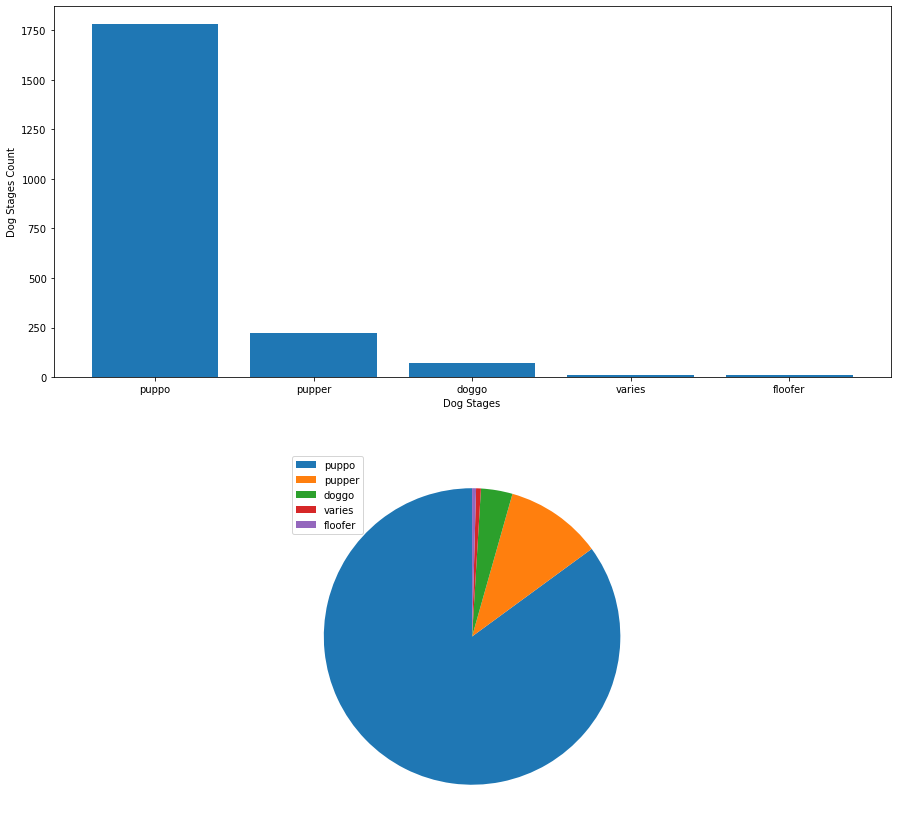

In [104]:
labels = list(stgs.keys())
counts = list(stgs.values())

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 15))

ax1.bar(labels, counts)
ax1.set_xlabel("Dog Stages")
ax1.set_ylabel("Dog Stages Count")

patches, texts = ax2.pie(counts, startangle=90)
ax2.legend(patches, labels, loc="best")

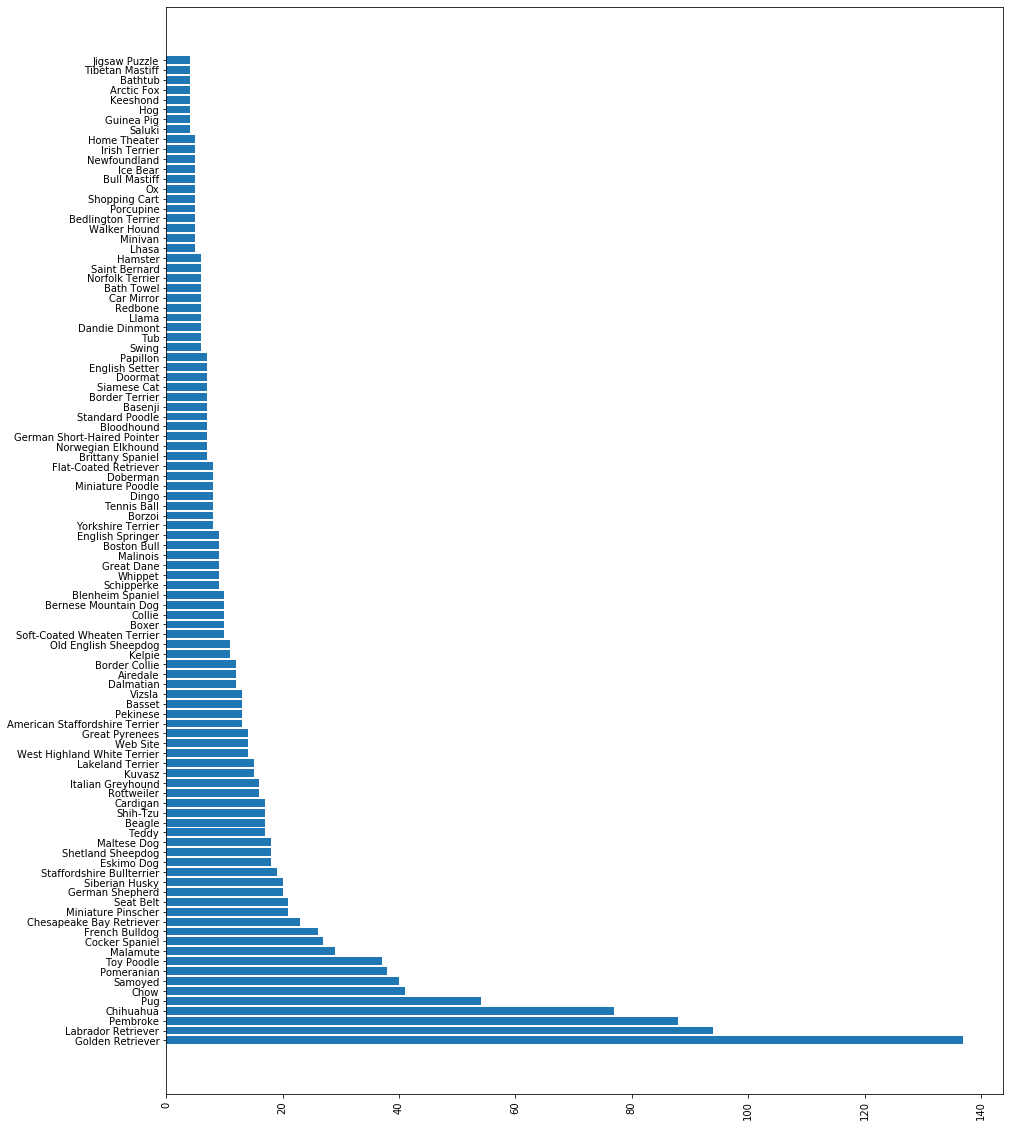

In [111]:
# Top 100 popular breeds of prediction_1
dog_breeds_dict = dict(df.prediction_1.value_counts())
dog_breeds_dict.pop(i, None)

plt.figure(figsize=(15,20))
plt.barh(list(dog_breeds_dict.keys())[:100], list(dog_breeds_dict.values())[:100])
plt.xticks(rotation=90)
plt.show()

In [85]:
# Top 100 popular dog names
df.name.value_counts()

None          706
Lucy           11
Charlie        11
Oliver         10
Cooper         10
Penny           9
Tucker          9
Sadie           8
Winston         8
Lola            8
Toby            7
Daisy           7
Bailey          6
Jax             6
Bella           6
Koda            6
Stanley         6
Oscar           6
Milo            5
Rusty           5
Dave            5
Chester         5
Louis           5
Bentley         5
Leo             5
Buddy           5
Bo              5
Scout           5
Winnie          4
Boomer          4
             ... 
Bobbay          1
Skittles        1
Lassie          1
Napolean        1
Balto           1
Jiminus         1
Antony          1
Stuart          1
Kloey           1
Amy             1
Ralphus         1
Bonaparte       1
Sunshine        1
Timber          1
Bell            1
Banditt         1
Peanut          1
Harlso          1
Ralpher         1
Kramer          1
Longfellow      1
Goose           1
Georgie         1
Swagger         1
Walker    

AttributeError: module 'matplotlib.pyplot' has no attribute 'set_xlabel'

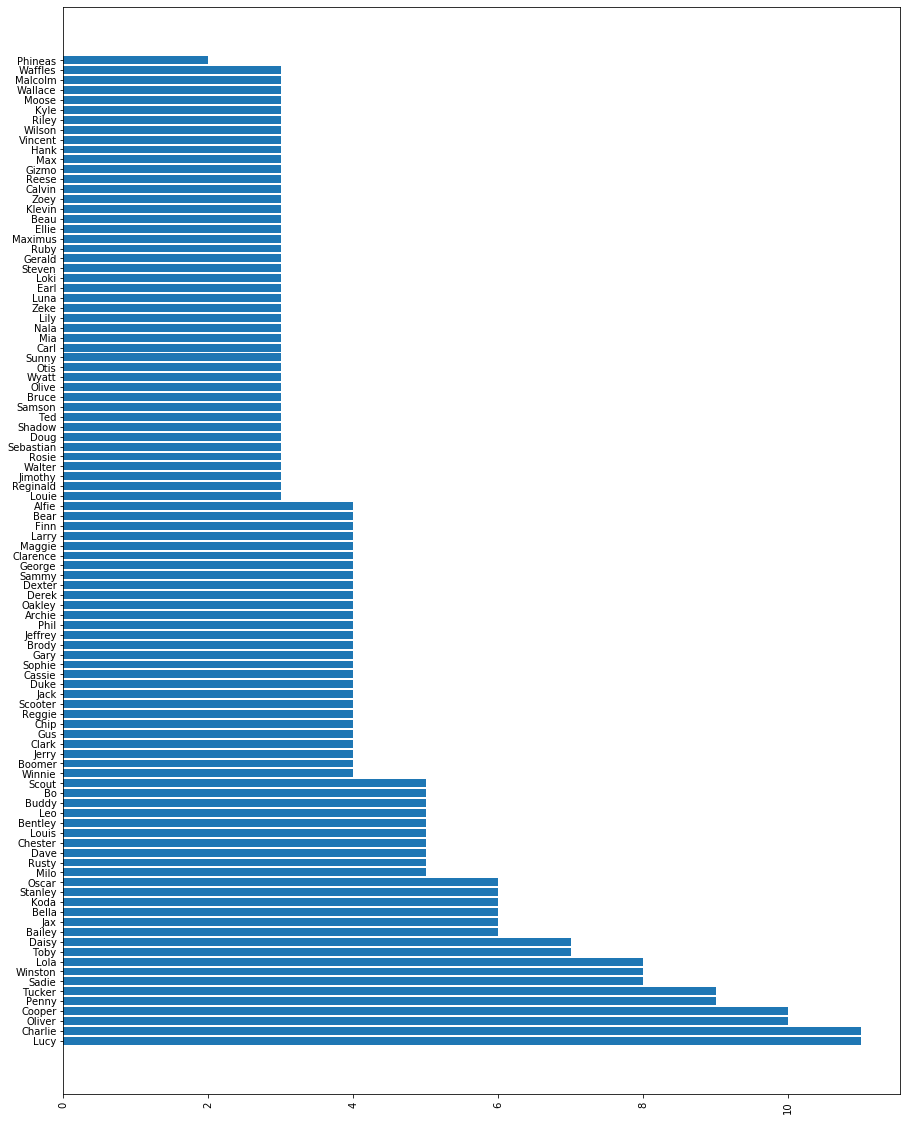

In [116]:
# Top 100 popular dog names
dog_names_dict = dict(df.name.value_counts())
dog_names_dict.pop('None', None)

plt.figure(figsize=(15,20))
plt.barh(list(dog_names_dict.keys())[:100], list(dog_names_dict.values())[:100])
plt.xticks(rotation=90)

plt.xlabel("Count")
plt.ylabel("Name")

plt.show()

Text(0, 0.5, 'Name')

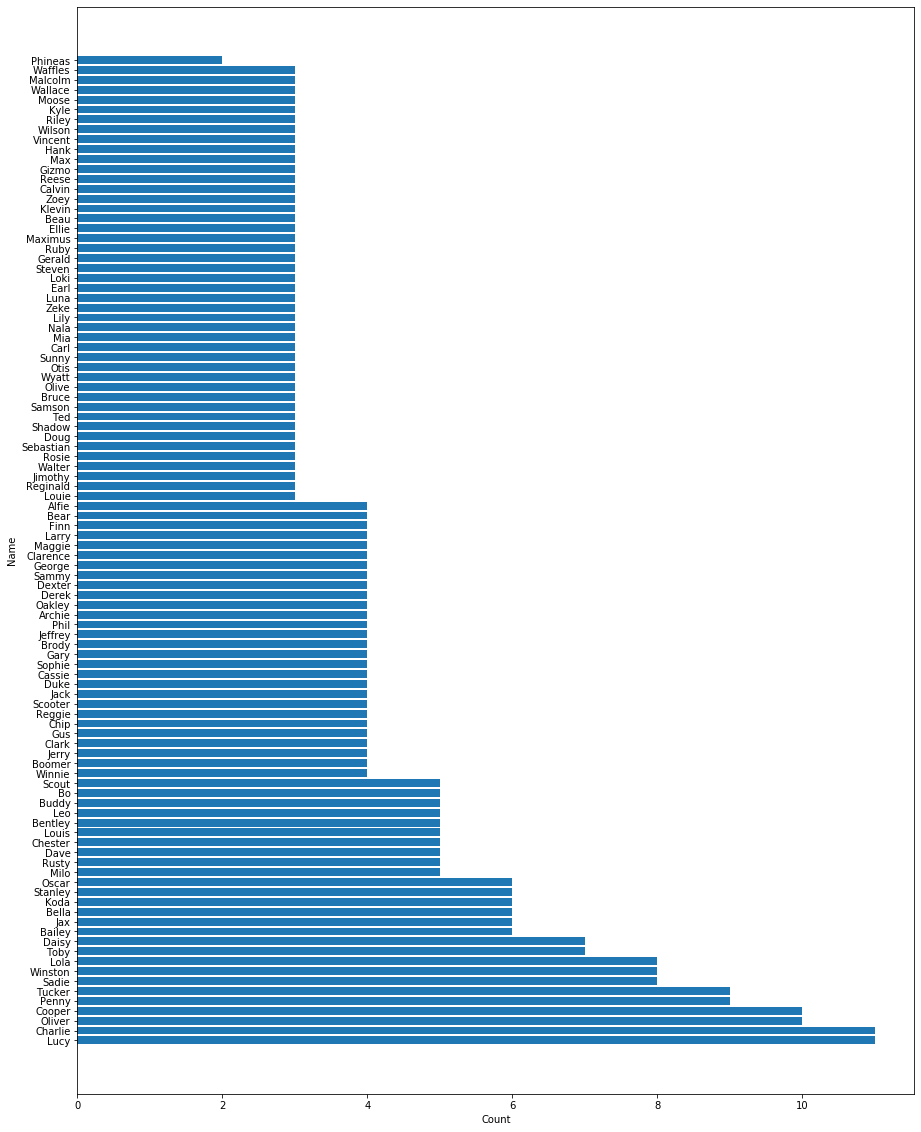

In [118]:
# Top 100 popular dog names
dog_names_dict = dict(df.name.value_counts())
dog_names_dict.pop('None', None)

fig, ax = plt.subplots(1, 1, figsize=(15, 20))
ax.barh(list(dog_names_dict.keys())[:100], list(dog_names_dict.values())[:100])

ax.set_xlabel("Count")
ax.set_ylabel("Name")

In [139]:
df[df.favorite_count == max(df.favorite_count)]

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,dog_stage,jpg_url,img_num,prediction_1,confidence_1,dog_1,prediction_2,confidence_2,dog_2,prediction_3,confidence_3,dog_3,retweet_count,favorite_count
324,822872901745569793,2017-01-21 18:26:02+00:00,Here's a super supportive puppo participating ...,13.0,10,None,puppo,https://pbs.twimg.com/media/C2tugXLXgAArJO4.jpg,1.0,Lakeland Terrier,0.196015,True,Labrador Retriever,0.160329,True,Irish Terrier,0.069126,True,48265,132810


In [80]:
# The dog that have most favourites count
df[df.favorite_count == max(df.favorite_count)]['jpg_url']

324    https://pbs.twimg.com/media/C2tugXLXgAArJO4.jpg
Name: jpg_url, dtype: object

In [124]:
# The dog that have most retweets count
df[df.retweet_count == max(df.retweet_count)]

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,dog_stage,jpg_url,img_num,prediction_1,confidence_1,dog_1,prediction_2,confidence_2,dog_2,prediction_3,confidence_3,dog_3,retweet_count,favorite_count
823,744234799360020481,2016-06-18 18:26:18+00:00,Here's a doggo realizing you can stand in a po...,13.0,10,None,doggo,https://pbs.twimg.com/ext_tw_video_thumb/74423...,1.0,Labrador Retriever,0.825333,True,Ice Bear,0.044681,False,Whippet,0.018442,True,79515,131075


In [125]:
df['jpg_url'][823]

'https://pbs.twimg.com/ext_tw_video_thumb/744234667679821824/pu/img/1GaWmtJtdqzZV7jy.jpg'